In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data = pd.read_csv(r'C:\Users\harsh\Desktop\Projects\Machine Learning\Predict Diabetes\diabetes.csv')
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
print("Dimensions of data : ", data.shape)

Dimensions of data :  (768, 9)


In [5]:
print(data.groupby("Outcome").size())

Outcome
0    500
1    268
dtype: int64


C:\Users\harsh\AppData\Local\Temp\ipykernel_7980\1803508908.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outcome', data=data, palette = ['blue','orange'])


<Axes: xlabel='Outcome', ylabel='count'>

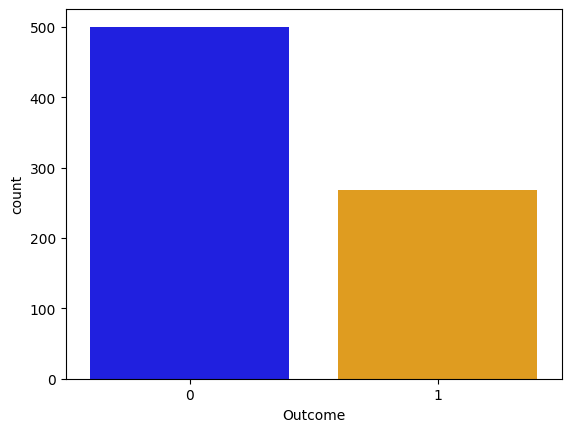

In [6]:
sns.countplot(x='Outcome', data=data, palette = ['blue','orange'])

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


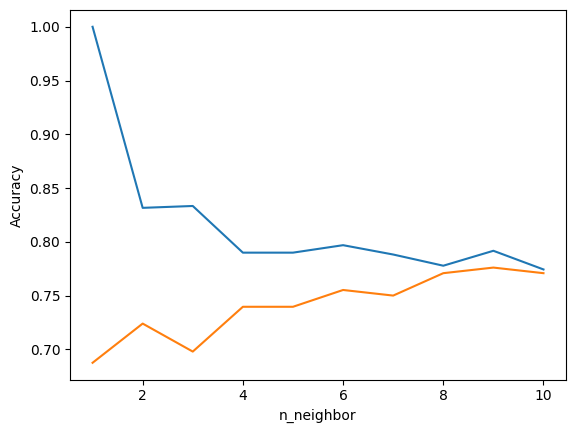

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data.iloc[:, data.columns != 'Outcome'], data['Outcome'], stratify=data['Outcome'], random_state=66)
from sklearn.neighbors import KNeighborsClassifier
training_accuracy = []
test_accuracy = []
neighbors_settings = range(1,11)
for n_neighbor in neighbors_settings:
    knn = KNeighborsClassifier(n_neighbors=n_neighbor)
    knn.fit(x_train, y_train)
    training_accuracy.append(knn.score(x_train, y_train))
    test_accuracy.append(knn.score(x_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label = 'Training Accuracy')
plt.plot(neighbors_settings, test_accuracy, label = 'Test Accuracy')
plt.ylabel("Accuracy")
plt.xlabel("n_neighbor")
plt.show()

In [9]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train, y_train)
print("Accuracy of KNN CLassifier on Training Set : ", knn.score(x_train, y_train))
print("Accuracy of KNN Classifier on Test Set : ", knn.score(x_test, y_test))

Accuracy of KNN CLassifier on Training Set :  0.7916666666666666
Accuracy of KNN Classifier on Test Set :  0.7760416666666666


In [10]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=0)
tree.fit(x_train, y_train)
print("Accuracy of Decision Tree on Training Set : ", tree.score(x_train, y_train))
print("Accuracy of Decision Tree on Test Set : ", tree.score(x_test, y_test))

Accuracy of Decision Tree on Training Set :  1.0
Accuracy of Decision Tree on Test Set :  0.7135416666666666


In [11]:
tree = DecisionTreeClassifier(max_depth=3, random_state=0)
tree.fit(x_train, y_train)
print("Accuracy of Decision Tree on Training Set : ", tree.score(x_train, y_train))
print("Accuracy of Decision Tree on Test Set : ", tree.score(x_test, y_test))

Accuracy of Decision Tree on Training Set :  0.7725694444444444
Accuracy of Decision Tree on Test Set :  0.7395833333333334


In [12]:
print("Feature Importance:")
for i, importance in enumerate(tree.feature_importances_):
    print(f"Feature {i+1}: {importance}")

Feature Importance:
Feature 1: 0.04554274604187444
Feature 2: 0.6830361974719775
Feature 3: 0.0
Feature 4: 0.0
Feature 5: 0.0
Feature 6: 0.27142105648614806
Feature 7: 0.0
Feature 8: 0.0


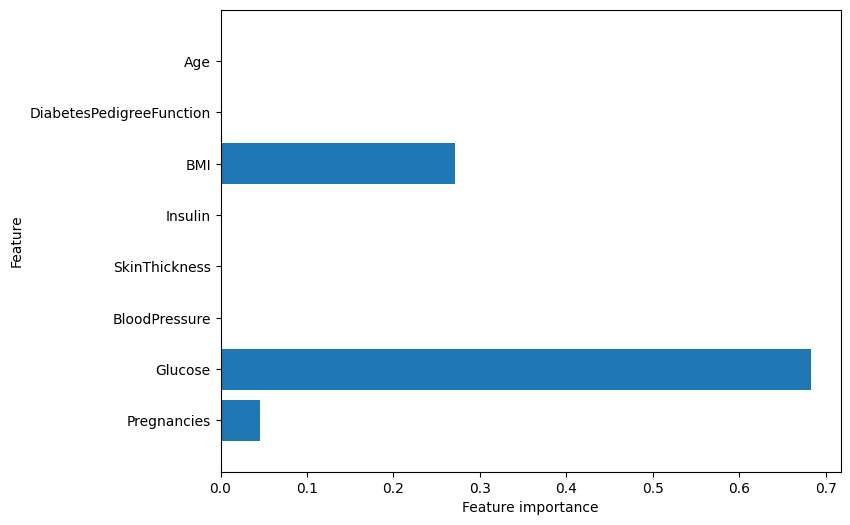

In [21]:
def plot_feature_importances_diabetes(model):
    diabetes_features = ["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]
    plt.figure(figsize=(8,6))
    n_features = 8
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), diabetes_features)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
plot_feature_importances_diabetes(tree)

In [14]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=0)
mlp.fit(x_train, y_train)
print("Accuracy of MLP Classifier on Training Set : ", mlp.score(x_train, y_train))
print("Accuracy of MLP Classifier on Test Set : ", mlp.score(x_test, y_test))

Accuracy of MLP Classifier on Training Set :  0.7430555555555556
Accuracy of MLP Classifier on Test Set :  0.671875


In [17]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
x_train_scaled = st.fit_transform(x_train)
x_test_scaled = st.fit_transform(x_test)
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=0)
mlp.fit(x_train_scaled, y_train)
print("Accuracy of MLP Classifier on Training Set : ", mlp.score(x_train_scaled, y_train))
print("Accuracy of MLP Classifier on Test Set : ", mlp.score(x_test_scaled, y_test))

Accuracy of MLP Classifier on Training Set :  0.8229166666666666
Accuracy of MLP Classifier on Test Set :  0.8020833333333334


c:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [18]:
mlp = MLPClassifier(random_state=0, max_iter = 1000, alpha = 1)
mlp.fit(x_train_scaled, y_train)
print("Accuracy of MLP Classifier on Training Set : ", mlp.score(x_train_scaled, y_train))
print("Accuracy of MLP Classifier on Test Set : ", mlp.score(x_test_scaled, y_test))

Accuracy of MLP Classifier on Training Set :  0.8055555555555556
Accuracy of MLP Classifier on Test Set :  0.796875


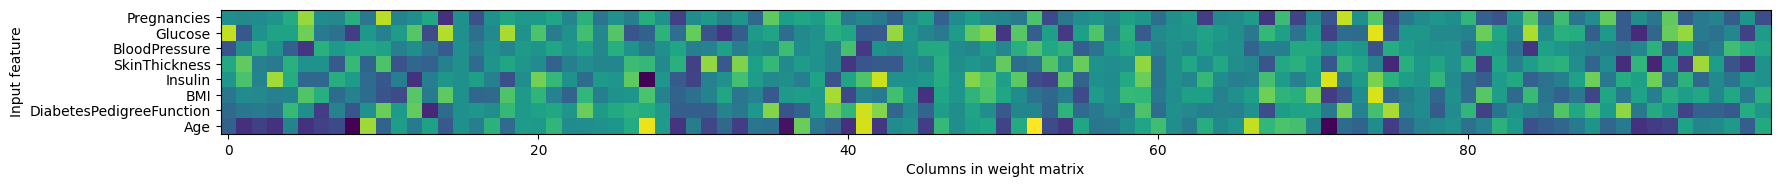

In [23]:
plt.figure(figsize = (20,5))
diabetes_features = ["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]
plt.imshow(mlp.coefs_[0], interpolation=None, cmap = 'viridis')
plt.yticks(range(8), diabetes_features)
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.show()